# Prediction Diabetes

## Import Libraries

In [3]:
import pandas as pd # pandas is a dataframe library
import matplotlib.pyplot as plt #%matplotlib.pyplot plots data
import numpy as np #numpy provides N-dim object support

#do ploting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [4]:
df = pd.read_csv("data/pima-data.csv") #load Pima data. Adjust path as necessary

In [5]:
df.shape

(768, 10)

In [6]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [7]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [8]:
df.isnull().values.any()

False

In [9]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Inputs:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns.
        
        Blue-cyan-yellow-red-darkred => less to more correlated
        0---------------------> 1
        Expected a darkred line running from top left to bottom right
        """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks
    

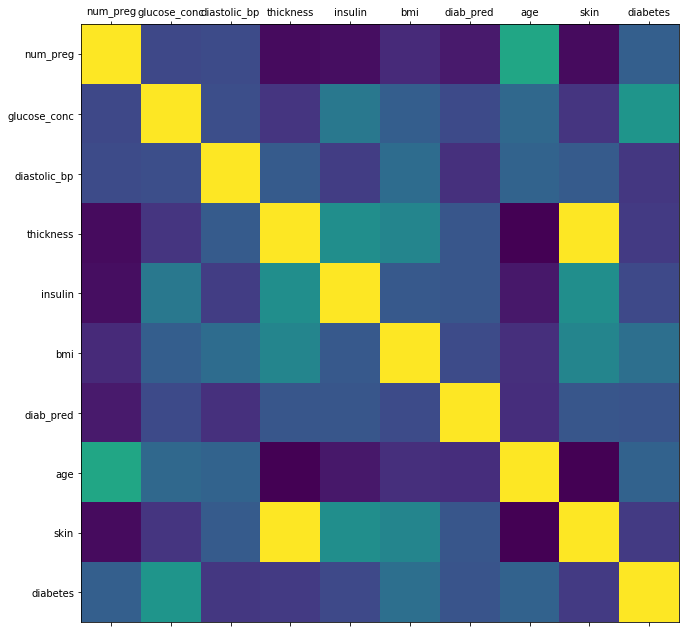

In [10]:
plot_corr(df)

In [11]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [13]:
del df['skin']

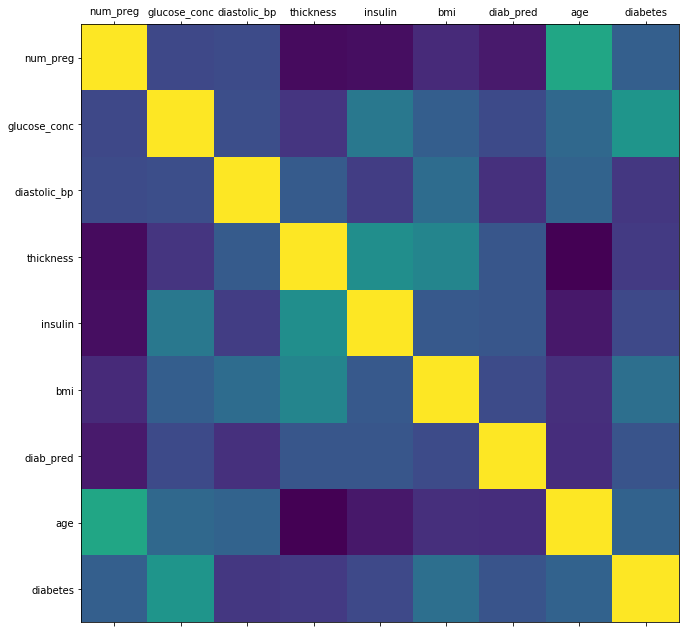

In [14]:
plot_corr(df)

In [15]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Check Data Types

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


 change True to 1, False to 0

In [17]:
diabetesMap= {True: 1, False: 0}

In [18]:
df['diabetes'] = df['diabetes'].map(diabetesMap)

In [19]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
numTrue = len(df.loc[df['diabetes']==True])
numFalse = len(df.loc[df['diabetes']==False])

In [21]:
print("Number of True cases:  {0} ({1:2.2f}%)".format(numTrue, (numTrue/ (numTrue+numFalse))*100))

Number of True cases:  268 (34.90%)


In [22]:
print("Number of False cases:  {0} ({1:2.2f}%)".format(numFalse, (numFalse/ (numTrue+numFalse))*100))

Number of False cases:  500 (65.10%)


# Splitting The Data

70% for training. 30% for testing.

In [25]:
from sklearn.cross_validation import train_test_split

featureColNames = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predictedClassNames = ['diabetes']

x = df[featureColNames].values # predictor feature columns (8 X ms)
y = df[predictedClassNames].values # predicted class ( 1=true, 0=false) column (1 X ms)
splitTestSize = 0.30

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=splitTestSize, random_state=42)
#test_size = .3 is 30%, 42 is the answer to everything

We check to ensure we have the desired 70% train, 30% test split of the data

In [27]:
print("{0:0.2f}% in training set".format((len(xTrain)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(xTest)/len(df.index))*100))

69.92% in training set
30.08% in test set


### Verifying predicted value was split correctly

In [29]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(yTrain[yTrain[:] == 1]), (len(yTrain[yTrain[:] == 1])/len(yTrain) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(yTrain[yTrain[:] == 0]), (len(yTrain[yTrain[:] == 0])/len(yTrain) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(yTest[yTest[:] == 1]), (len(yTest[yTest[:] == 1])/len(yTest) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(yTest[yTest[:] == 0]), (len(yTest[yTest[:] == 0])/len(yTest) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-Split Data Preparation

In [30]:
#### Hidden Missing Values

In [31]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have unexpected 0 values?

In [32]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [33]:
### Impute with the mean

In [41]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill0 = Imputer(missing_values=0, strategy='mean', axis=0)

xTrain = fill0.fit_transform(xTrain)
xTest = fill0.fit_transform(xTest)

# Training Initial Algorithm - Naive Bayes


In [43]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nbModel = GaussianNB()

nbModel.fit(xTrain, yTrain.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [45]:
# predict values using the training data
nbPredictTrain = nbModel.predict(xTrain)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, nbPredictTrain)))
print()

Accuracy: 0.7542



In [48]:
# predict values using the testing data
nbPredictTest = nbModel.predict(xTest)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, nbPredictTest)))
print()

Accuracy: 0.7359



### Metrics

In [50]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(yTest, nbPredictTest)))
print("")

print("Classification Report")
print(metrics.classification_report(yTest, nbPredictTest))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



### [[TN, FP],[FN,TP]] - Confusion Matrix
### Recall = TP / (TP+FN)
### Precision TP / (TP+FP)

# Random Forest
#### - Ensember Alogrithm
#### - Fits multilpe tress with subset of data
#### - Averages tree results to improve performance ans control overfitting

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(random_state=42)  # create randome forest object
rfModel.fit(xTrain, yTrain.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
rfPredictTrain = rfModel.predict(xTrain)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTrain, rfPredictTrain)))
print()

Accuracy: 0.9870



In [55]:
rfPredictTest = rfModel.predict(xTest)
# testing metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, rfPredictTest)))
print()

Accuracy: 0.7100



In [56]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(yTest, rfPredictTest)))
print("")

print("Classification Report")
print(metrics.classification_report(yTest, rfPredictTest))

Confusion Matrix
[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



### This huge difference between training and test metrics means the algorithm is learning the training data too well and overfitting.

In [62]:
from sklearn.linear_model import LogisticRegression

lrModel = LogisticRegression(C=0.7, random_state=42)
lrModel.fit(xTrain,yTrain.ravel())
lrPredictTest = lrModel.predict(xTest)


In [64]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lrPredictTest)))
print()

print("Classification Report")
print(metrics.classification_report(yTest, lrPredictTest))

Accuracy: 0.7446

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



Setting regularization parameter

In [67]:
cStart = 0.1
cEnd = 5
cInc = 0.1

cValues, recallScores = [], []

cVal = cStart
bestRecallScore = 0
while (cVal < cEnd):
    cValues.append(cVal)
    lrModelLoop = LogisticRegression(C=cVal, random_state=42)
    lrModelLoop.fit(xTrain, yTrain.ravel())
    lrPredictLoopTest = lrModelLoop.predict(xTest)
    recallScore = metrics.recall_score(yTest, lrPredictLoopTest)
    recallScores.append(recallScore)
    if (recallScore > bestRecallScore):
        bestRecallScore = recallScore
        bestLrPredictTest = lrPredictLoopTest
        
    cVal = cVal + cInc

bestScoreCVal = cValues[recallScores.index(bestRecallScore)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(bestRecallScore, bestScoreCVal))

1st max value of 0.613 occured at C=1.400


Text(0,0.5,'Recall Score')

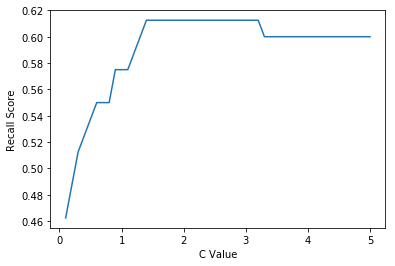

In [70]:
%matplotlib inline
plt.plot(cValues,recallScores, '-')
plt.xlabel("C Value")
plt.ylabel("Recall Score")

### Logistics Regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0,0.5,'Recall Score')

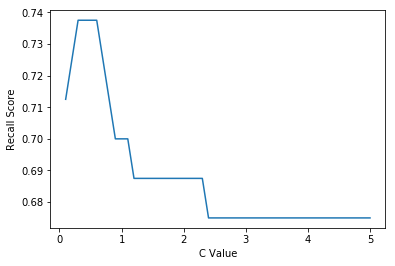

In [71]:
cStart = 0.1
cEnd = 5
cInc = 0.1

cValues, recallScores = [], []

cVal = cStart
bestRecallScore = 0
while (cVal < cEnd):
    cValues.append(cVal)
    lrModelLoop = LogisticRegression(C=cVal, class_weight="balanced", random_state=42)
    lrModelLoop.fit(xTrain, yTrain.ravel())
    lrPredictLoopTest = lrModelLoop.predict(xTest)
    recallScore = metrics.recall_score(yTest, lrPredictLoopTest)
    recallScores.append(recallScore)
    if (recallScore > bestRecallScore):
        bestRecallScore = recallScore
        bestLrPredictTest = lrPredictLoopTest
        
    cVal = cVal + cInc
bestScoreCVal = cValues[recallScores.index(bestRecallScore)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(bestRecallScore, bestScoreCVal))
%matplotlib inline
plt.plot(cValues,recallScores, '-')
plt.xlabel("C Value")
plt.ylabel("Recall Score")

In [74]:
from sklearn.linear_model import LogisticRegression

lrModel = LogisticRegression(class_weight="balanced", C=bestScoreCVal, random_state=42)
lrModel.fit(xTrain,yTrain.ravel())
lrPredictTest = lrModel.predict(xTest)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lrPredictTest)))
print()

print("Classification Report")
print(metrics.classification_report(yTest, lrPredictTest))
print(metrics.recall_score(yTest,lrPredictTest))

Accuracy: 0.7143

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231

0.7375


### Logistic Regression Cross Validation

In [75]:

from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(xTrain, yTrain.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [76]:
lr_cv_predict_test = lr_cv_model.predict(xTest)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(yTest, lr_cv_predict_test)))
print(metrics.confusion_matrix(yTest, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

NameError: name 'X_test' is not defined